In [3]:
using PyPlot

In [4]:
"""plot line y = w*x+b"""
function plotline(w,b;
                  xmin=-100,xmax=100)
    xsamples = [xmin, xmax]
    plot(xsamples, [w*x+b for x in xsamples], color="black")
end

plotline (generic function with 1 method)

In [20]:
"""plot function y=f(x)"""
function plotfunc(f;
                  xmin=-100,xmax=100,nsamples=100)
    xsamples = linspace(xmin,xmax,nsamples)
    plot(xsamples, [f(x) for x in xsamples], color="black")
end

plotfunc (generic function with 1 method)

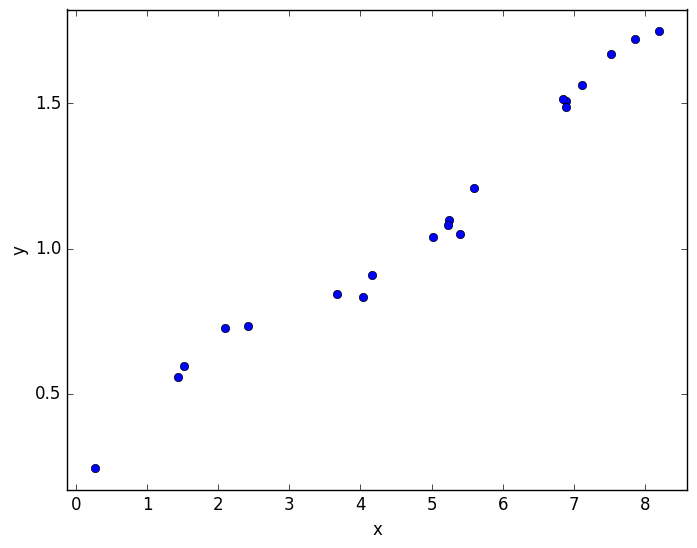

(-0.12472290408977926,8.589481557384227)

In [22]:
# Generate and plot data
srand(2)
n = 20
function sample_data(num_points)
    x = rand(num_points)*10
    y = .2 + .2*x + .1*sin(x) + .03*randn(num_points) - .1*(x/6).^2
    return x,y
end
x,y = sample_data(n)

"""function to plot the above data"""
function plotdata(x=x,y=y; margin=.05)
    hold(true)
    plot(x,y,"o")
    xlabel("x")
    ylabel("y")
    range_y = maximum(y) - minimum(y)
    range_x = maximum(x) - minimum(x)
    ylim([minimum(y)-margin*range_y,maximum(y)+margin*range_y])
    xlim([minimum(x)-margin*range_x,maximum(x)+margin*range_x])
end
plotdata()

# Approximating with the mean

In [19]:
# the mean solves a very simple least squares problem:
X = ones(n,1) # n number of ones

println(X)
println(y)
w = X\y
println(w)

(20,1)[1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0]
[0.842599034516231,1.0974291492829822,0.726928989315304,1.74798539786564,1.0405501172897835,1.207969841046394,1.0821245531517616,0.908751230705321,1.0504122821705357,1.5090960731340748,0.5570763414355884,1.515720988554833,0.24608771160628337,1.722733192989778,1.4884055844258917,0.7328156644919331,1.5636475497549003,0.834117544123423,1.669229197876936,0.5951532756209698]
[1.1069416859679284]


In [8]:
# check the solution to our least squares problem is the mean of y
abs(mean(y) - w[1]) # indexing starts from 1

2.220446049250313e-16

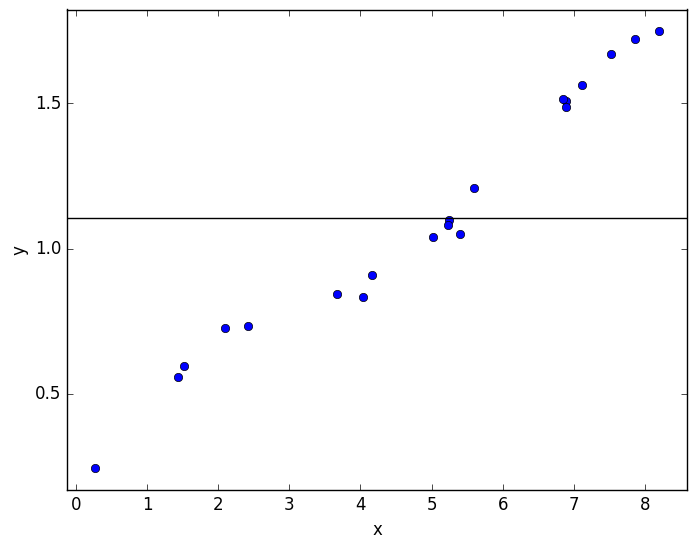

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000001024B160>

In [9]:
# plot the fit
clf() # clears the previous figure
plotdata()
plotline(0, w[1]) # horizontal line at the mean of y

# Approximating with a line, Adding an offset

In [10]:
X = [copy(x) ones(length(x))] # Need to have the space. If you use comma, it'll concatenate at the bottom (ie vertical)

20x2 Array{Float64,2}:
 3.66796   1.0
 5.23879   1.0
 2.10256   1.0
 8.19338   1.0
 5.01371   1.0
 5.59355   1.0
 5.23559   1.0
 4.1587    1.0
 5.40152   1.0
 6.89567   1.0
 1.43836   1.0
 6.85137   1.0
 0.271377  1.0
 7.85383   1.0
 6.89278   1.0
 2.42258   1.0
 7.11323   1.0
 4.03459   1.0
 7.51799   1.0
 1.51662   1.0

In [11]:
w = X\y

2-element Array{Float64,1}:
 0.180877
 0.225941

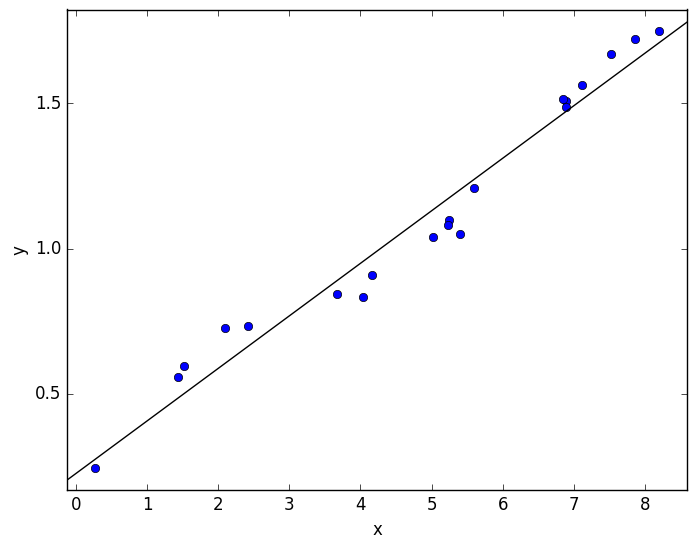

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000102BB7F0>

In [12]:
# plot the fit
clf()
plotdata()
plotline(w[1], w[2]) # gradient, offset

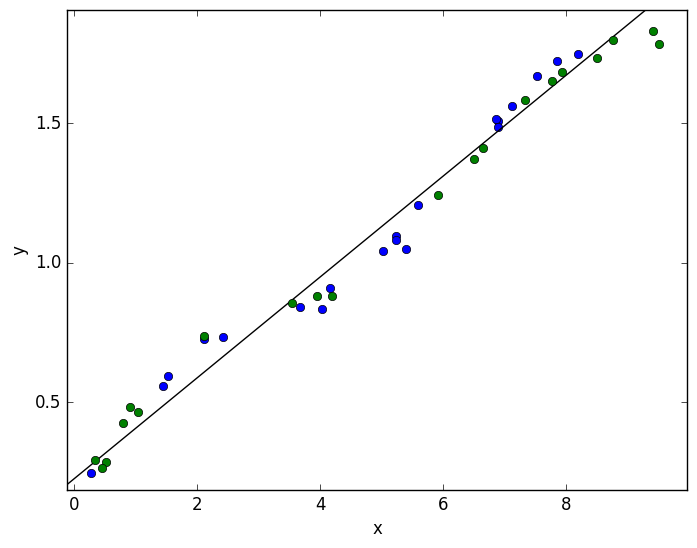

(-0.11964090999831162,9.96549823569426)

In [13]:
# plot fit on out of sample data
clf()
plotdata()
plotline(w[1], w[2])

xtest,ytest = sample_data(20)
plotdata(xtest,ytest)

# Approximating with a polynomial

In [14]:
# first, construct a Vandermonde matrix
max_order = 10

X = zeros(n, max_order+1)
for k=0:max_order
    X[:,k+1] = x.^k # dot: element-wise
end
X

20x11 Array{Float64,2}:
 1.0  3.66796   13.454       49.3486     …     1.20178e5      4.40809e5 
 1.0  5.23879   27.4449     143.778            2.97218e6      1.55706e7 
 1.0  2.10256    4.42078      9.29497        803.052       1688.47      
 1.0  8.19338   67.1315     550.034            1.66406e8      1.36343e9 
 1.0  5.01371   25.1373     126.031            2.00186e6      1.00368e7 
 1.0  5.59355   31.2878     175.01       …     5.36031e6      2.99832e7 
 1.0  5.23559   27.4114     143.515            2.95592e6      1.5476e7  
 1.0  4.1587    17.2947      71.9236           3.72061e5      1.54729e6 
 1.0  5.40152   29.1764     157.597            3.91418e6      2.11425e7 
 1.0  6.89567   47.5502     327.89             3.52522e7      2.43087e8 
 1.0  1.43836    2.06887      2.97577    …    26.3511        37.9022    
 1.0  6.85137   46.9413     321.613            3.32659e7      2.27917e8 
 1.0  0.271377   0.0736456    0.0199858        7.98292e-6     2.16638e-6
 1.0  7.85383   61.6827    

In [15]:
# solve least squares problem
w = X\y

11-element Array{Float64,1}:
   2.2722    
 -12.3185    
  22.5667    
 -19.7746    
  10.0734    
  -3.23117   
   0.673572  
  -0.091156  
   0.00772686
  -0.00037272
   7.80701e-6

In [16]:
"""computes our polynomial fit evaluated at x"""
function p(x)
    y = 0
    for k=0:max_order
        y += w[k+1]*x^k
    end
    return y
end

p (generic function with 1 method)

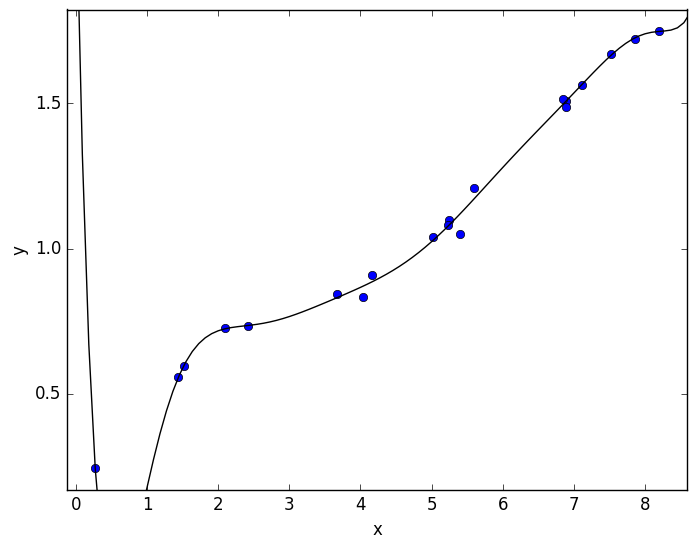

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000103293C8>

In [17]:
# plot fit
clf()
plotdata()
plotfunc(p, xmin=0, xmax=9)

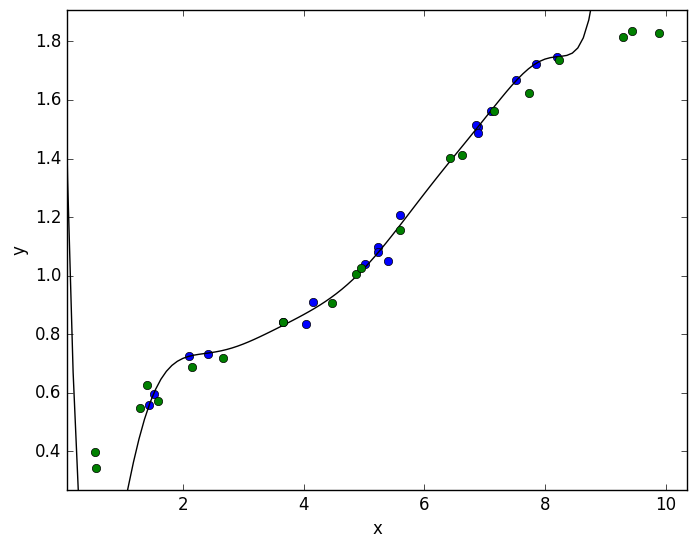

(0.080460210653297,10.355083301643862)

In [18]:
# plot fit on out of sample data
clf()
plotdata()
plotfunc(p, xmin=0, xmax=9)

xtest,ytest = sample_data(20)
plotdata(xtest,ytest) # Fits very badly